In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import FFNet
from dataset import Dummy, QM7, QM7b, QM7X, QM9, ANI1x
from learning import Learn, Selector

from torch.optim import Adam
from torch.nn import MSELoss, L1Loss

<class 'cosmosis.dataset.Dummy'> dataset created...
epoch: 0 of 10, train loss: 37477.24722782258, val loss: 33559.184895833336
epoch: 1 of 10, train loss: 26520.061302923386, val loss: 20796.939453125
epoch: 2 of 10, train loss: 12528.089229460686, val loss: 7237.71337890625
epoch: 3 of 10, train loss: 3118.3931392546624, val loss: 1433.1943766276042
epoch: 4 of 10, train loss: 1396.1393609816027, val loss: 1097.3915201822917
epoch: 5 of 10, train loss: 1102.2616813413558, val loss: 1039.0419108072917
epoch: 6 of 10, train loss: 1019.0117620652721, val loss: 1089.3750406901042
epoch: 7 of 10, train loss: 897.6834657730594, val loss: 912.7864786783854
epoch: 8 of 10, train loss: 1103.1693351499496, val loss: 945.8519490559896
epoch: 9 of 10, train loss: 1034.7789877614666, val loss: 1104.0431722005208
test loss: 959.8700764973959
y_pred:
tensor([[ -87.6827],
        [  90.6654],
        [-171.0275],
        [-235.7937],
        [  19.6428],
        [-244.2571],
        [ -69.5783],
   

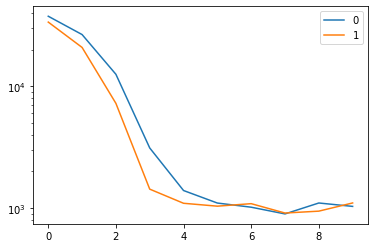

learning time: 0:00:09.910516


In [2]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'make': 'make_regression',
             'make_params': {'n_samples': 10000,
                             'n_features': 128}}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88}

Learn(Dummy, FFNet, Selector, Optimizer=Adam, Criterion=MSELoss, 
      model_params=model_params, ds_params=ds_params, opt_params=opt_params,
      crit_params=crit_params, sample_params=sample_params,
      save_model=False, load_model=False, load_embed=False, adapt=False,
      batch_size=256, epochs=10)

<class 'dataset.QM7'> dataset created...
epoch: 0 of 10, train loss: 1515.454872824929, val loss: 1449.95166015625
epoch: 1 of 10, train loss: 1298.2399236505682, val loss: 1061.2120361328125
epoch: 2 of 10, train loss: 671.3643604625355, val loss: 263.19627380371094
epoch: 3 of 10, train loss: 156.41041946411133, val loss: 94.77534484863281
epoch: 4 of 10, train loss: 117.71747381036931, val loss: 165.41362762451172
epoch: 5 of 10, train loss: 114.24415709755637, val loss: 67.00119400024414
epoch: 6 of 10, train loss: 129.7281469865279, val loss: 100.83013153076172
epoch: 7 of 10, train loss: 119.81043694236062, val loss: 143.8548240661621
epoch: 8 of 10, train loss: 111.61209730668502, val loss: 66.59994316101074
epoch: 9 of 10, train loss: 115.83770960027522, val loss: 123.42340278625488
test loss: 85.38663864135742
y_pred:
tensor([[-1563.6892],
        [-1177.5264],
        [-1152.4476],
        [-1718.5195],
        [-1382.7852],
        [-1478.1838],
        [-1435.1222],
       

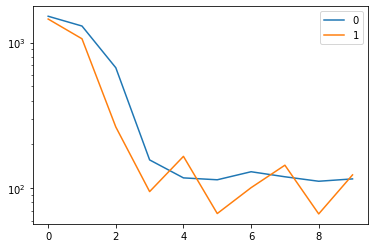

learning time: 0:00:08.649439


In [3]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=10, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

<class 'dataset.QM7b'> dataset created...
epoch: 0 of 10, train loss: 1539.828524502841, val loss: 1479.225830078125
epoch: 1 of 10, train loss: 1322.254932750355, val loss: 1075.7664184570312
epoch: 2 of 10, train loss: 746.4495946710759, val loss: 418.66180419921875
epoch: 3 of 10, train loss: 260.2268243269487, val loss: 131.12063217163086
epoch: 4 of 10, train loss: 160.68628345836294, val loss: 137.72735595703125
epoch: 5 of 10, train loss: 140.93658169833097, val loss: 174.75241088867188
epoch: 6 of 10, train loss: 126.19768142700195, val loss: 98.94725036621094
epoch: 7 of 10, train loss: 126.41241593794389, val loss: 100.323486328125
epoch: 8 of 10, train loss: 129.40108524669301, val loss: 128.36740493774414
epoch: 9 of 10, train loss: 129.00624396584251, val loss: 109.02283096313477
test loss: 116.93284606933594
y_pred:
tensor([[-1657.2733],
        [-1786.0520],
        [-1447.5947],
        [-1385.1519],
        [-1363.5264],
        [-1771.2875],
        [-1796.7186],
    

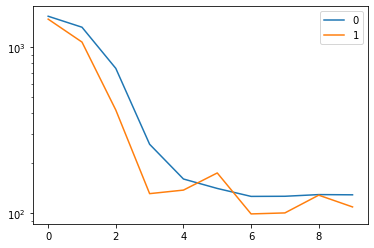

learning time: 0:00:13.560684


In [4]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=10, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
QM9 molecules scanned:  10001
QM9 molecules created:  450
QM9 molecules scanned:  20001
QM9 molecules created:  456
QM9 molecules scanned:  30001
QM9 molecules created:  678
QM9 molecules scanned:  40001
QM9 molecules created:  681
QM9 molecules scanned:  50001
QM9 molecules created:  683
QM9 molecules scanned:  60001
QM9 molecules created:  683
QM9 molecules scanned:  70001
QM9 molecules created:  683
QM9 molecules scanned:  80001
QM9 molecules created:  683
QM9 molecules scanned:  90001
QM9 molecules created:  683
QM9 molecules scanned:  100001
QM9 molecules created:  683
QM9 molecules scanned:  110001
QM9 molecules created:  683
QM9 molecules scanned:  120001
QM9 molecules created:  683
QM9 molecules scanned:  130001
QM9 molecules created:  709
total QM9 molecules created: 763
<class 'dataset.QM9'> dataset created...
epoch: 0 of 10, train loss: 219.65238955113796, val loss: 94.10915284998276
epoch: 1 of 10, 

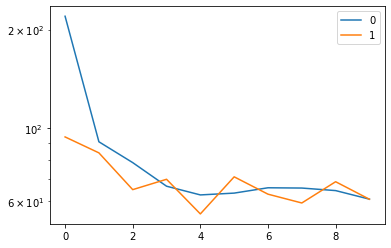

learning time: 0:03:14.176457


In [5]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 10*10, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb'], 
             'target': 'U0',
             'pad': 10, 
             'filter_on': ('n_atoms','>','10'),
             'use_pickle': False}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=16, epochs=10, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=False, load_model=False)

<class 'dataset.ANI1x'> dataset created...
epoch: 0 of 1000, train loss: 516.7805939062583, val loss: 343.5856228017362
epoch: 100 of 1000, train loss: 29.706238348515793, val loss: 30.88493018436566
epoch: 200 of 1000, train loss: 23.915216468744447, val loss: 29.752017636526894
epoch: 300 of 1000, train loss: 23.384289024679664, val loss: 21.840073396854304
epoch: 400 of 1000, train loss: 19.572522541675315, val loss: 19.30557204550115
epoch: 500 of 1000, train loss: 18.365822256897776, val loss: 21.499985500442946
epoch: 600 of 1000, train loss: 18.14616890577875, val loss: 16.317093208635427
epoch: 700 of 1000, train loss: 16.715109449849475, val loss: 15.71900703647921
epoch: 800 of 1000, train loss: 15.859163887840602, val loss: 11.968703770689377
epoch: 900 of 1000, train loss: 15.499093881244002, val loss: 21.309961970517282
test loss: 12.146311803031159
y_pred:
tensor([[ -634.4287],
        [ -410.6037],
        [ -627.4285],
        [ -510.1279],
        [ -648.1012],
       

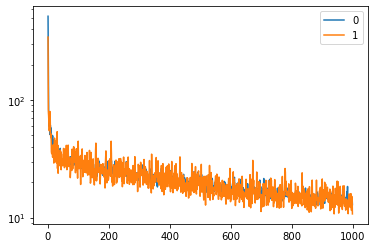

learning time: 0:26:28.499145


In [6]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 64*63+63+63+63, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'features': ['atomic_numbers','coordinates'],
             'targets': ['wb97x_dz.energy'],
             'embed': [(9,64,True)],
             'pad': 63, #length of the longest molecule in the dataset
             'criterion': None,
             'conformation': 'random',
             'in_file': './data/ani1/ani1x-release.h5'}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88} #deterministic train/test set selection

learn = Learn(Dataset=ANI1x, Model=FFNet, Sampler=Selector, Optimizer=Adam, 
              Criterion=L1Loss, batch_size=128, epochs=1000, opt_params=opt_params, 
              model_params=model_params, ds_params=ds_params, crit_params=crit_params, 
              sample_params=sample_params, save_model=True, load_model=False,
              load_embed=False)

mapping...  <HDF5 file "1000.hdf5" (mode r)>
mapping...  <HDF5 file "2000.hdf5" (mode r)>
mapping...  <HDF5 file "3000.hdf5" (mode r)>
mapping...  <HDF5 file "4000.hdf5" (mode r)>
mapping...  <HDF5 file "5000.hdf5" (mode r)>
mapping...  <HDF5 file "6000.hdf5" (mode r)>
mapping...  <HDF5 file "7000.hdf5" (mode r)>
mapping...  <HDF5 file "8000.hdf5" (mode r)>
molecular formula (idmol) mapped:  6899
total molecular structures (idconf) mapped:  6899
<class 'dataset.QM7X'> dataset created...
epoch: 0 of 10, train loss: 70.86834549260503, val loss: 61.73774889564794
epoch: 1 of 10, train loss: 39.71894311101997, val loss: 13.038585068511487
epoch: 2 of 10, train loss: 9.198564755162362, val loss: 6.939150067885876
epoch: 3 of 10, train loss: 7.37353626896209, val loss: 6.557359963867664
epoch: 4 of 10, train loss: 7.028723590748809, val loss: 6.875465055975438
epoch: 5 of 10, train loss: 6.075366409809385, val loss: 7.208986447042465
epoch: 6 of 10, train loss: 6.252328228306679, val loss: 4

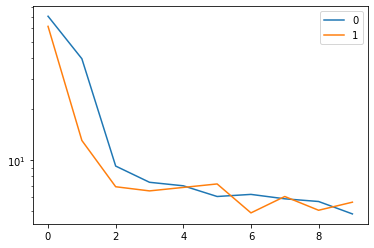

learning time: 0:01:55.378361


In [7]:
ds_params = {'features': 
                 ['DIP','HLgap','KSE','atC6','atNUM','atPOL','atXYZ', 
                 'eC','eDFTB+MBD','eEE','eH','eKIN','eKSE','eL','eMBD',
                 'eNE','eNN','ePBE0','ePBE0+MBD','eTS','eX','eXC','eXX',
                 'hCHG','hDIP','hRAT','hVDIP','hVOL','mC6','mPOL','mTPOL',
                 'pbe0FOR','sMIT','sRMSD','totFOR','vDIP','vEQ','vIQ',
                 'vTQ','vdwFOR','vdwR'],
             'pad': 654, #length of the longest molecule features
             'target': ['eAT'],
             'selector': ['i1-c1-opt']}

opt_params = {'lr': 0.001}

model_params = {'D_in': 654, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

crit_params = {'reduction': 'sum'}

sample_params = {'split': .1, 'subset': False}

Learn(Dataset=QM7X, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=256, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=False, load_model=False)

#find the longest molecule features
#qm7x = QM7X(**ds_params)
#l = 0
#for i in qm7x.ds_idx:
#    s = qm7x[i][0].shape.numel()
#    if s > l:
#        l = s
#print(l)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 128+32+64+32+64, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}
crit_params = {'reduction': 'sum'}
sample_params = {'split': .1, 'subset': False}

Learn(Dataset=Champs, Model=FFNet, Sampler=ChampSelector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=1024, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=True, load_model=False)

In [ ]:
model_params = {'D_in': 128+32+64+32+64, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'features': False,
             'use_h5': False,  
             'infer': True}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, batch_size=2048, model_params=model_params, 
      ds_params=ds_params, load_model='./models/20201021_2101.pth', adapt=False)